In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/train_data/train_task_3_4.csv')
data

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3
...,...,...,...,...,...,...
1382722,80,2608,57945,1,2,2
1382723,707,2549,584230,0,2,1
1382724,840,5901,1138956,1,1,1
1382725,794,3854,1151183,0,1,3


In [3]:
grouped_data = data.groupby('QuestionId').agg(
    count = pd.NamedAgg(column='IsCorrect', aggfunc='count'),
                mean = pd.NamedAgg(column='IsCorrect', aggfunc='mean'),
                sem = pd.NamedAgg(column='IsCorrect', aggfunc='sem')
            ).reset_index()

grouped_data.head()

,QuestionId,count,mean,sem
0,0,2812,0.443457,0.009370
1,1,14,0.571429,0.137253
2,2,2313,0.385214,0.010121
3,3,2672,0.808757,0.007610
4,4,1704,0.401408,0.011878


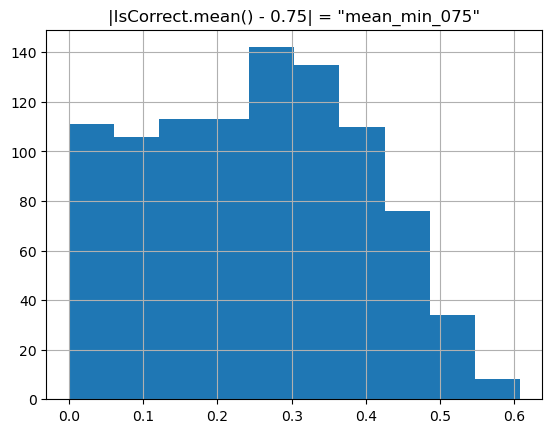

In [4]:
grouped_data['mean_min_075'] = abs(grouped_data['mean'] - 0.75)

plt.title('|IsCorrect.mean() - 0.75| = "mean_min_075"')
grouped_data['mean_min_075'].hist()
plt.show()

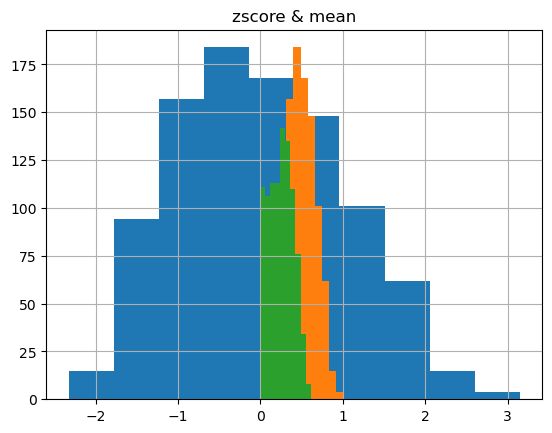

In [5]:
df = grouped_data

grouped_data['zscore'] = (df['mean'] - np.mean(df['mean'])) / np.std(df['mean'])


plt.title('zscore & mean')
grouped_data['zscore'].hist()

grouped_data['mean'].hist()

grouped_data['mean_min_075'].hist()

plt.show()

In [6]:
grouped_data

,QuestionId,count,mean,sem,mean_min_075,zscore
0,0,2812,0.443457,0.009370,0.306543,-0.405919
1,1,14,0.571429,0.137253,0.178571,0.411018
2,2,2313,0.385214,0.010121,0.364786,-0.777723
3,3,2672,0.808757,0.007610,0.058757,1.926059
4,4,1704,0.401408,0.011878,0.348592,-0.674342
...,...,...,...,...,...,...
943,943,2653,0.566528,0.009623,0.183472,0.379737
944,944,189,0.142857,0.025521,0.607143,-2.324861
945,945,2337,0.422336,0.010220,0.327664,-0.540745
946,946,111,0.459459,0.047516,0.290541,-0.303761


In [7]:
# sort by mean - 0.75
fsort = grouped_data.sort_values(by='mean_min_075', ascending=True)

fsort.head(n=10)

,QuestionId,count,mean,sem,mean_min_075,zscore
43,43,232,0.750000,0.028490,0.000000,1.550968
807,807,144,0.750000,0.036210,0.000000,1.550968
153,153,4,0.750000,0.250000,0.000000,1.550968
730,730,4,0.750000,0.250000,0.000000,1.550968
608,608,4,0.750000,0.250000,0.000000,1.550968
195,195,2554,0.748630,0.008585,0.001370,1.542220
480,480,2351,0.748618,0.008949,0.001382,1.542143
421,421,2820,0.748582,0.008171,0.001418,1.541913
688,688,1727,0.751592,0.010400,0.001592,1.561133
321,321,590,0.752542,0.017781,0.002542,1.567198


In [8]:
fsort['score'] = fsort['mean_min_075'].rank(ascending=True)

score_sort = fsort.sort_values(by='mean_min_075', ascending=False)

score_sort

,QuestionId,count,mean,sem,mean_min_075,zscore,score
944,944,189,0.142857,0.025521,0.607143,-2.324861,948.0
931,931,1702,0.160400,0.008898,0.589600,-2.212875,947.0
155,155,1675,0.164776,0.009067,0.585224,-2.184937,946.0
425,425,78,0.179487,0.043733,0.570513,-2.091025,945.0
718,718,658,0.183891,0.015114,0.566109,-2.062915,944.0
...,...,...,...,...,...,...,...
730,730,4,0.750000,0.250000,0.000000,1.550968,3.0
153,153,4,0.750000,0.250000,0.000000,1.550968,3.0
807,807,144,0.750000,0.036210,0.000000,1.550968,3.0
608,608,4,0.750000,0.250000,0.000000,1.550968,3.0


In [9]:
duplicated = score_sort[score_sort.duplicated(subset='score')]

len(duplicated)

63

In [10]:
eval_validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')

eval_validation['1count'] = (eval_validation[["T1_ALR", "T2_CL", "T3_GF", "T4_MQ", "T5_NS"]] == 1).sum(axis=1)
eval_validation['2count'] = (eval_validation[["T1_ALR", "T2_CL", "T3_GF", "T4_MQ", "T5_NS"]] == 2).sum(axis=1)

eval_validation.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,1count,2count
0,0,0,909,318,2,2,2,1.0,2,1,4
1,16,16,285,609,2,2,2,2.0,2,0,5
2,48,48,132,271,1,2,2,2.0,1,2,3
3,38,38,704,127,2,2,1,2.0,2,1,4
4,33,33,16,586,1,1,2,2.0,2,2,3


In [11]:
left = eval_validation['left']
right = eval_validation['right']

l_score = eval_validation['1count']/5*1.3
r_score = eval_validation['2count']/5*1.3

public = pd.DataFrame({'QuestionId': pd.concat([left, right]),
                    'score': pd.concat([l_score, r_score])})

public.head()

,QuestionId,score
0,909,0.26
1,285,0.00
2,132,0.52
3,704,0.26
4,16,0.52


In [12]:
df2 = score_sort
df1 = public

df_merged = df2.join(df1.set_index('QuestionId'), on='QuestionId', how='left', rsuffix='_df1')
df_merged['score'] = df_merged['score'] + df_merged['score_df1'].fillna(0)
df_merged = df_merged.drop(columns='score_df1').drop_duplicates(subset='QuestionId')

df_merged.sample(n=5)

,QuestionId,count,mean,sem,mean_min_075,zscore,score
466,466,601,0.630616,0.019704,0.119384,0.788852,216.0
842,842,72,0.333333,0.055945,0.416667,-1.108915,812.0
400,400,104,0.384615,0.047937,0.365385,-0.781545,723.5
673,673,2348,0.775980,0.008606,0.025980,1.716814,48.0
299,299,10,0.500000,0.166667,0.250000,-0.044962,461.0


In [13]:
duplicated = df_merged[df_merged.duplicated(subset='score')]

len(duplicated)

60

In [14]:
df_merged['rank'] = df_merged['score'].rank(ascending=False)

result = df_merged.sort_values('rank', ascending=True)

result['rank'] = range(1, len(result) + 1)

result

,QuestionId,count,mean,sem,mean_min_075,zscore,score,rank
944,944,189,0.142857,0.025521,0.607143,-2.324861,948.00,1
931,931,1702,0.160400,0.008898,0.589600,-2.212875,947.00,2
155,155,1675,0.164776,0.009067,0.585224,-2.184937,946.00,3
425,425,78,0.179487,0.043733,0.570513,-2.091025,945.00,4
718,718,658,0.183891,0.015114,0.566109,-2.062915,944.00,5
...,...,...,...,...,...,...,...,...
153,153,4,0.750000,0.250000,0.000000,1.550968,3.26,944
730,730,4,0.750000,0.250000,0.000000,1.550968,3.00,945
807,807,144,0.750000,0.036210,0.000000,1.550968,3.00,946
608,608,4,0.750000,0.250000,0.000000,1.550968,3.00,947


In [15]:
template = pd.read_csv('submission/template.csv')
template.head()

,QuestionId,ranking
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [16]:
df1 = result
df2 = template

merged_df = pd.merge(df2, df1[['QuestionId', 'rank']], on='QuestionId', how='left')
merged_df = merged_df.drop('ranking', axis=1)
merged_df = merged_df.rename(columns={'rank': 'ranking'})

merged_df

,QuestionId,ranking
0,0,355
1,1,624
2,2,228
3,3,841
4,4,273
...,...,...
943,943,616
944,944,1
945,945,310
946,946,395


In [17]:
merged_df.to_csv('20192665.csv', index=False)

## Test
by private

In [18]:
eval_test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')
eval_test.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,15,15,145,762,2,2,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1
2,25,25,278,195,1,1,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1


In [19]:
eval_test['1count'] = (eval_test[["T1_ALR", "T2_CL", "T3_GF", "T4_MQ", "T5_NS"]] == 1).sum(axis=1)
eval_test['2count'] = (eval_test[["T1_ALR", "T2_CL", "T3_GF", "T4_MQ", "T5_NS"]] == 2).sum(axis=1)

eval_test.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,1count,2count
0,15,15,145,762,2,2,2,2.0,2,0,5
1,31,31,307,208,1,1,1,2.0,1,4,1
2,25,25,278,195,1,1,1,1.0,1,5,0
3,3,3,13,153,2,2,2,2.0,2,0,5
4,40,40,23,100,2,1,1,1.0,1,4,1


<AxesSubplot:>

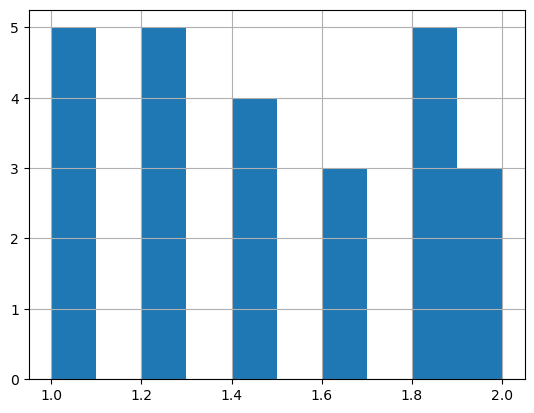

In [20]:
# take the average of scores by 5 evaulators
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['score'].hist()

In [21]:
test_preference = []

for idx in range(len(eval_test)):
    if eval_test['1count'][idx] > eval_test['2count'][idx]:
        test_preference.append(1)
    
    else :
        test_preference.append(2)

test_preference

[2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2]

In [22]:
def preference(truth):
    left = list(truth.left)
    right = list(truth.right)
    
    truth_left = []
    truth_right = []
    truth_preference = []
    
    for idx in range(len(left)):
        truth_left.append(left[idx])
        truth_right.append(right[idx])

In [23]:
submission = pd.read_csv('20192665.csv')

submission.head()

,QuestionId,ranking
0,0,355
1,1,624
2,2,228
3,3,841
4,4,273


In [24]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    return submission_preference
    
submission_preference = evaluate(eval_test, submission)

In [25]:
submission_preference

[2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2]

<AxesSubplot:>

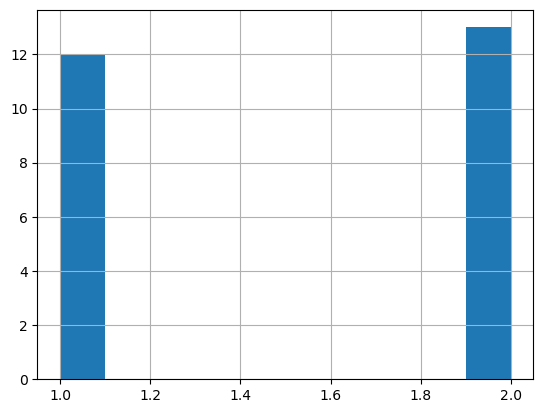

In [26]:
submission_df = pd.DataFrame({'score': submission_preference})
submission_df['score'].hist()

<AxesSubplot:>

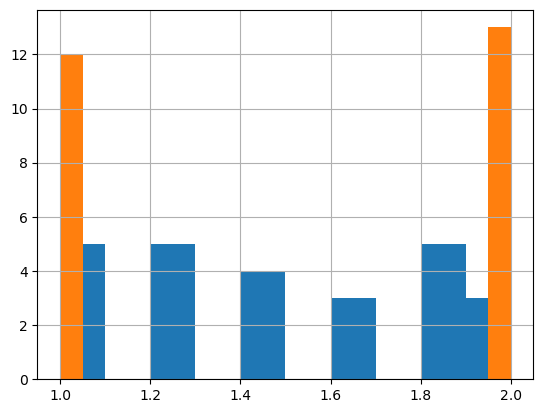

In [27]:
eval_test['score'].hist()
submission_df['score'].hist(bins=20)

In [28]:
count = 0

for i in range(len(test_preference)):
    if test_preference[i] == submission_preference[i]:
        count += 1

print("전문가 의견과 내 모델의 일치율은", int(count/25 * 100), "% 입니다.")


전문가 의견과 내 모델의 일치율은 68 % 입니다.


In [29]:
count

17

In [30]:
result_df = pd.DataFrame({'test_preference': test_preference, 'submission_preference': submission_preference})

result_df['compare'] = (result_df['test_preference'] == result_df['submission_preference']).astype(int)

result_df

,test_preference,submission_preference,compare
0,2,2,1
1,1,2,0
2,1,1,1
3,2,1,0
4,1,1,1
5,1,2,0
6,1,1,1
7,1,1,1
8,1,1,1
9,2,2,1


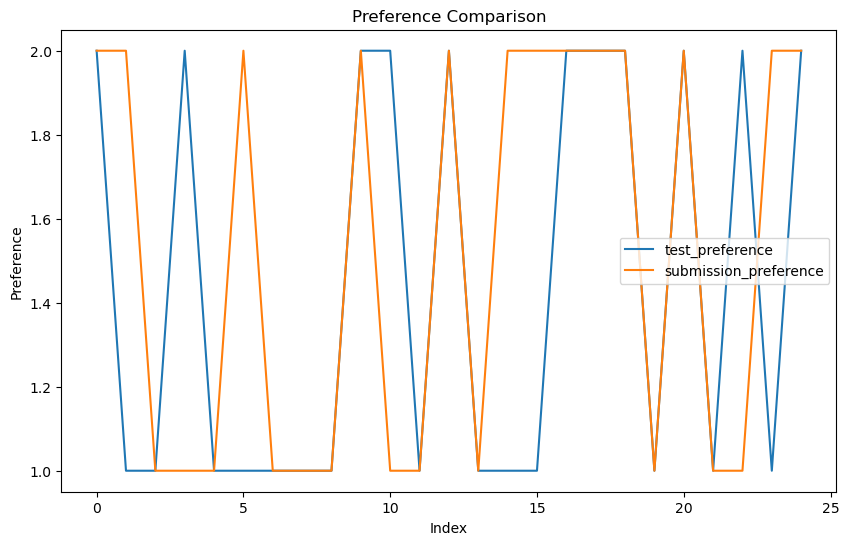

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(result_df.index, result_df['test_preference'], label='test_preference')
plt.plot(result_df.index, result_df['submission_preference'], label='submission_preference')

plt.title('Preference Comparison')
plt.xlabel('Index')
plt.ylabel('Preference')

plt.legend()

plt.show()